In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
import astropy.units as u
from astropy.cosmology import Planck18, z_at_value

In [89]:
import matplotlib

font = {'family' : 'serif',
        'size'   : 16}

matplotlib.rc('font', **font)


In [90]:
plotdir = 'powerlaw_3.5_plots/'

In [91]:
# Mc_files = ['powerlaw_3.5_lams/lam_0_1_linear_grid_0_to_576.csv']
Mc_files = ['powerlaw_3.5_lams_m2_lim/powerlaw_alpha_3.5_lam_0_1_Mc_0_9600.csv']



df1 = pd.DataFrame()
for fi in Mc_files:
    df_temp = pd.read_csv(fi)
    df1 = df1.append(df_temp)
# drop the zero rows that resulted from NoneType Networks
df = df1.loc[~(df1==0).all(axis=1)]


In [92]:
# drop the zero rows that resulted from NoneType Networks
# df = df.loc[~(df==0).all(axis=1)]
df = df[df["Mc"] > 0]
df = df[df["q"] < 10]


# Convert everything to source mass
df["Mc"] = df["Mc"] / (1+df["z"])
df["M_tot"] = df["M_tot"] / (1+df["z"])
df["m1"] = df["m1"] / (1+df["z"])
df["m2"] = df["m2"] / (1+df["z"])


print("Total number of events:",len(df))


df

Total number of events: 9115


,Mc,eta,DL,z,m1,m2,M_tot,q,snr,DL_stat_err,...,inspiral_t,Mc_full_bias,Mc_stat_err,full_inner_prod,lam_0,lam_1,bias_0,bias_1,inner_0,inner_1
0,4.752314,0.249079,36122.208361,3.950486,5.803150,5.139006,10.942156,1.129236,15.980261,29869.813129,...,46.457778,0.060039,0.022487,0.821138,0.0,1.0,5.288159e-15,0.060039,1.0,0.821138
1,4.451886,0.249917,9117.112299,1.269851,5.208366,5.021431,10.229797,1.037227,20.064366,1245.727081,...,191.302173,0.002977,0.001457,0.928733,0.0,1.0,4.166727e-16,0.002977,1.0,0.928733
2,4.379121,0.249993,38339.828892,4.154491,5.057183,5.003568,10.060750,1.010715,11.998673,13686.017507,...,49.827903,0.055125,0.026109,0.829009,0.0,1.0,5.197129e-15,0.055125,1.0,0.829009
3,6.163918,0.249998,9480.674145,1.310782,7.101992,7.059050,14.161042,1.006083,43.937751,2011.356031,...,107.904064,0.009825,0.001596,0.895621,0.0,1.0,1.104300e-15,0.009825,1.0,0.895621
4,5.010997,0.249999,57700.904020,5.888207,5.768919,5.743363,11.512281,1.004450,7.989468,27283.202300,...,24.211453,0.212753,0.126591,0.734152,0.0,1.0,8.784996e-15,0.212753,1.0,0.734152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9344,5.042074,0.249881,67815.644705,6.769052,5.919636,5.667306,11.586941,1.044524,25.017184,86364.788664,...,19.473486,0.360705,0.067626,0.697596,0.0,1.0,1.411091e-14,0.360705,1.0,0.697596
9345,5.106860,0.249463,32477.896743,3.612009,6.146012,5.601614,11.747626,1.097186,17.746477,5269.666154,...,46.372165,0.056843,0.016478,0.821036,0.0,1.0,5.103414e-15,0.056843,1.0,0.821036
9346,4.627450,0.249778,32456.397264,3.609999,5.476960,5.159804,10.636764,1.061467,20.078876,7134.582215,...,54.803044,0.041820,0.011974,0.838869,0.0,1.0,4.265100e-15,0.041820,1.0,0.838869
9347,4.702529,0.249672,15762.914013,1.983349,5.601776,5.210306,10.812081,1.075134,26.845498,2045.392511,...,110.668202,0.010452,0.003017,0.897298,0.0,1.0,1.356250e-15,0.010452,1.0,0.897298


In [93]:
# n_lams = 20
# lam_colnames = ['lam_'+str(id) for id in range(n_lams)]
# lams = df[lam_colnames].iloc[0].values

# bias_colnames = ['bias_'+str(id) for id in range(n_lams)]
# bias_lams = df[bias_colnames]
# rel_bias_lams = df[bias_colnames].div(df["Mc"], axis='rows')

# sig_bias_lams = df[bias_colnames].div(df["Mc_stat_err"], axis='rows')

# inner_colnames = ['inner_'+str(id) for id in range(n_lams)]
# inner_prod_lams = df[inner_colnames]

# rel_bias_lams

In [94]:
def plot_bias_features(x, y, feature, show_unbiased=False, mtot=None, qmax=None, colormap='RdBu_r',\
        xlabel="Mc ($M_\odot$)", ylabel="$\eta", cbar_label="Faithfulness",\
        title="Minimum Faithfulness required \nfor unbiased Mc", xlim=None, ylim=None, plt_show=True, savefig=None, **kwargs):
    
    mask = np.ones(len(df["Mc"]), dtype=bool)
    z = df["z"].iloc[0]

    if qmax is not None:
        mask = mask * (df["q"] < qmax) 
        title = title + " (q < " + str(np.round(qmax,2)) + ")"
    
    x = x[mask]
    y = y[mask]
    feature = feature[mask]

    fig, ax = plt.subplots(figsize=(8, 6))
    cm = plt.cm.get_cmap(colormap)

    sc = plt.scatter(x, y, c=feature, cmap=cm, **kwargs)
    cbar = plt.colorbar(sc)
    cbar.set_label(cbar_label)

    if show_unbiased:
        unbiased_mask = (df["Mc_stat_err"]>df["bias_9"])
        plt.scatter(x[unbiased_mask*mask], y[unbiased_mask*mask], c="white",  s=100, edgecolors='g', lw=3, label='Unbiased')
        plt.legend()

    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)
        
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.tight_layout()

    if savefig is not None:
        plt.savefig(plotdir+savefig+'.pdf')
    if plt_show:
        plt.show()


# Overall Population

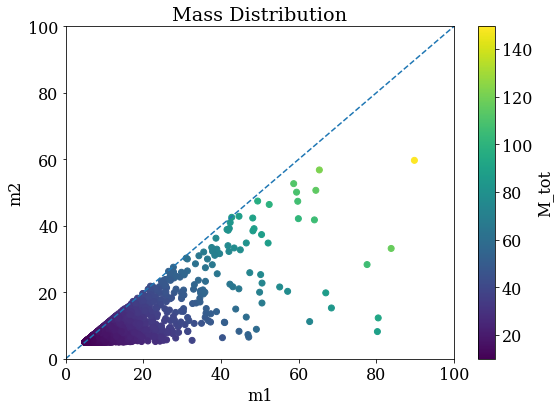

In [95]:
# Mass Distribution
plot_bias_features(df["m1"], df["m2"], df["M_tot"], colormap="viridis", mtot=None,\
    title="Mass Distribution", xlabel="m1", ylabel="m2", cbar_label="M_tot", plt_show=False)
mmax = 100
plt.xlim(0, mmax)
plt.ylim(0, mmax)
x=np.linspace(0, mmax, 10)
plt.plot(x, x, '--')


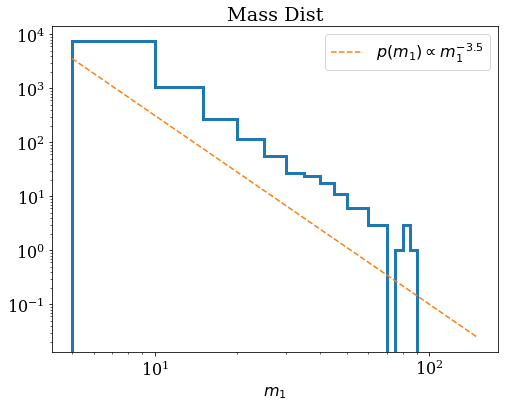

In [96]:
# Mass Distribution
fig, ax = plt.subplots(figsize=(8, 6))
bins = np.linspace(5, 150, 30)

x = np.linspace(5, 150, 100)
plt.hist(df["m1"], bins, histtype='step', lw=3)
plt.plot(x, 1000000*x**(-3.5), linestyle='--', label='$p(m_1) \propto m_1^{-3.5}$')

plt.loglog()

plt.xlabel("$m_1$")
plt.ylabel("")
plt.title("Mass Dist")
plt.legend()

# plt.savefig(plotdir+"powerlaw_m1_dist.pdf")
plt.show()

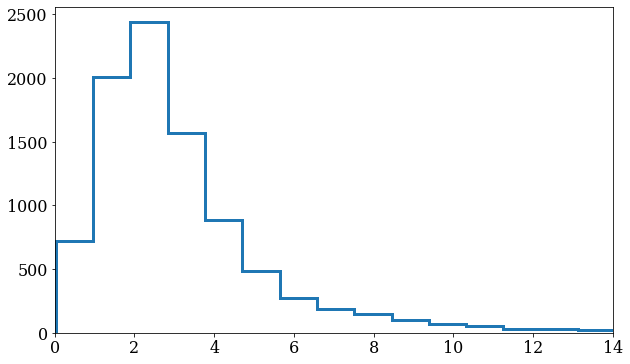

8.14965019745006


In [125]:
fig, ax = plt.subplots(figsize=(10, 6))

# bins = np.linspace(0, 500, 50)
plt.hist(df["z"], bins=50, histtype='step', lw=3)
plt.xlim(0, 14)
plt.show()
print(np.percentile(df["z"], 95))
# print(np.median(df["M_tot"]))

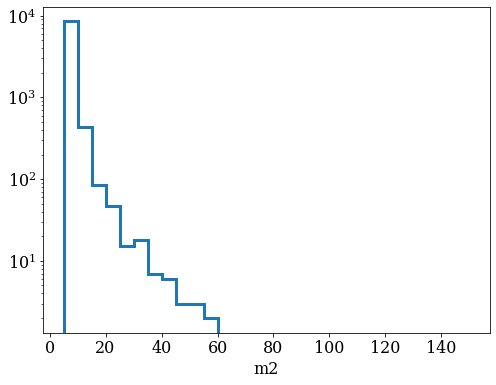

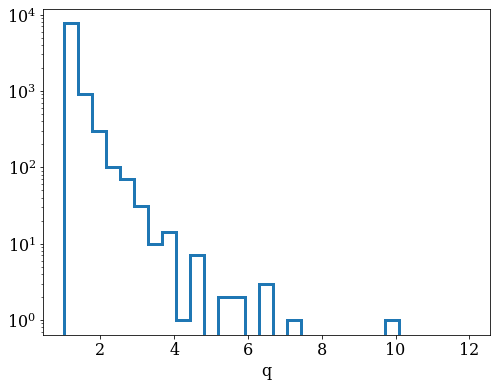

In [97]:
fig, ax = plt.subplots(figsize=(8, 6))
# bins = np.linspace(1.0, 12.0, 30)
plt.hist(df["m2"], bins, histtype='step', lw=3)

plt.semilogy()

plt.xlabel("m2")
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
bins = np.linspace(1.0, 12.0, 30)
plt.hist(df["q"], bins, histtype='step', lw=3)

plt.semilogy()

plt.xlabel("q")
plt.show()


In [98]:
def p_z_madau_fragos(z, z_min, z_max):
    '''
    Return normalized z-distribution from the Madau Fragos (2017)
    star formation rate density.
    '''
    term_1 = (1+z)**(2.6)
    term_2 = 1 + ((1+z)/3.2)**(6.2)

    psi = 0.01 * term_1/term_2
    norm = np.sum(psi)
    psi = psi/norm

    return psi

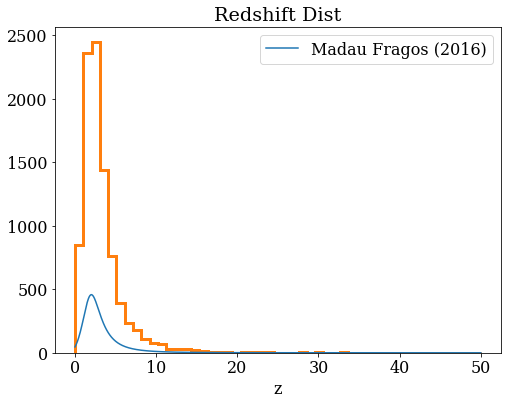

In [105]:
# Redshift Distribution
fig, ax = plt.subplots(figsize=(8, 6))
z_min = 0.02
z_max = 50
bins = np.linspace(z_min, z_max, 50)

z_range = np.linspace(z_min, z_max, 1000)
pdf_z = p_z_madau_fragos(z_range, z_min, z_max)
plt.plot(z_range, 30000*pdf_z, label="Madau Fragos (2016)")

plt.hist(df["z"], bins, histtype='step', lw=3)

# plt.xlim(0, 15)

plt.legend()
plt.xlabel("z")
plt.ylabel("")
plt.title("Redshift Dist")
plt.show()

# Features

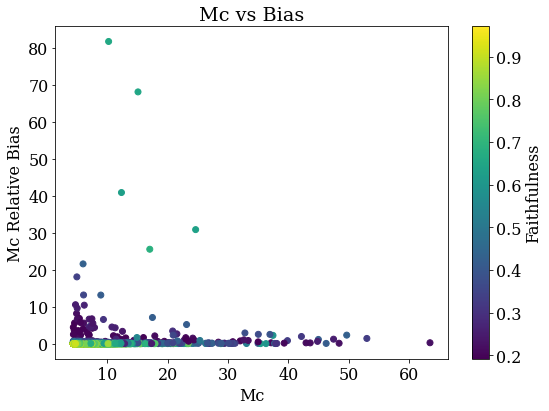

In [100]:
plot_bias_features(df["Mc"], np.abs(df["Mc_full_bias"]/df["Mc"]), df["full_inner_prod"], colormap="viridis",\
    title="Mc vs Bias", xlabel="Mc", ylabel="Mc Relative Bias", cbar_label="Faithfulness", savefig='mc_vs_bias')

Lower Mc events tend to have lower bias, higher faithfulness. Higher Mc events tend to have higher bias, lower faithfulness.

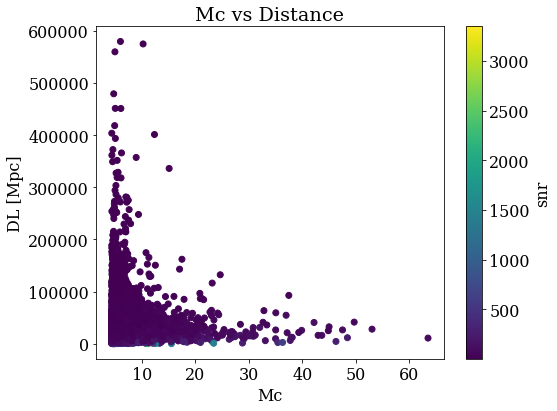

In [101]:
plot_bias_features(df["Mc"], df["DL"], df["snr"], colormap="viridis",\
    title="Mc vs Distance", xlabel="Mc", ylabel="DL [Mpc]", cbar_label="snr")

The events that made it through the gwbench pipeline have to be heavier if they are placed father away.

# Bias Stuff

8899


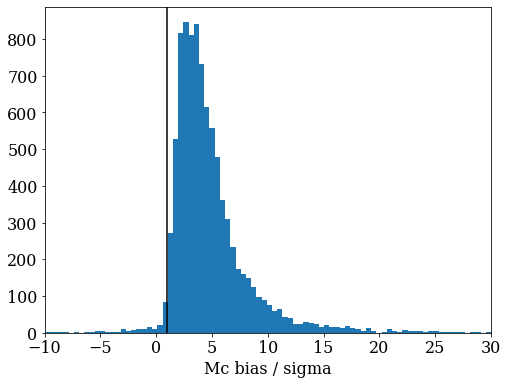

In [104]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.hist(df["Mc_full_bias"]/df["Mc_stat_err"], bins = 1000)
plt.xlim(-10, 30)
plt.axvline(x=1, color='k')

print(np.sum(df["Mc_full_bias"]/df["Mc_stat_err"]>1))

plt.xlabel("Mc bias / sigma")
plt.show()

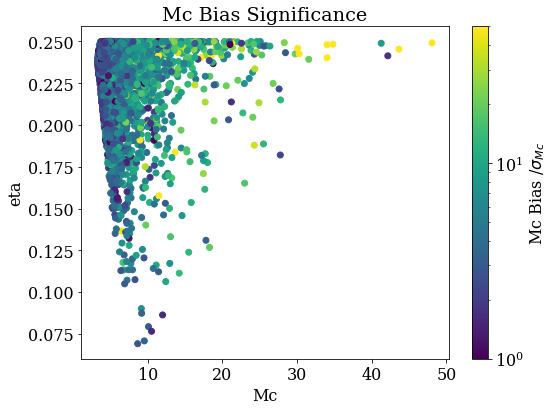

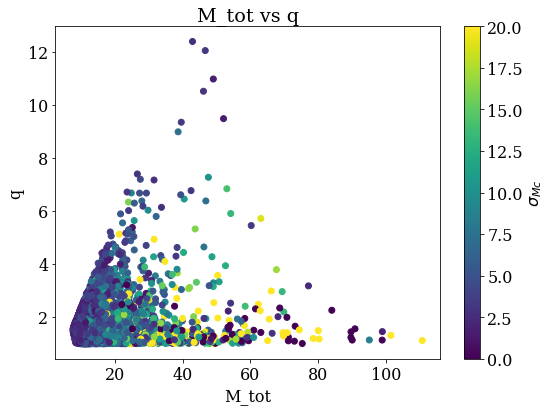

In [15]:
plot_bias_features(df["Mc"], df["eta"], df["Mc_full_bias"]/df["Mc_stat_err"], colormap="viridis",\
    title="Mc Bias Significance", xlabel="Mc", ylabel="eta", cbar_label="Mc Bias /$\sigma_{Mc}$", norm=matplotlib.colors.LogNorm(1, 50), savefig='mc_bias_sig_distribution')

plot_bias_features(df["M_tot"], df["q"], df["Mc_full_bias"]/df["Mc_stat_err"], colormap="viridis",\
    title="M_tot vs q", xlabel="M_tot", ylabel="q", cbar_label="$\sigma_{Mc}$", vmin=0, vmax=20)

All the events (so far) are biased more than 1 $\sigma$. The significance of the bias seems to be larger for migh Mc, unequal masses.

## Mc biases over lambda grid

NameError: name 'lams' is not defined

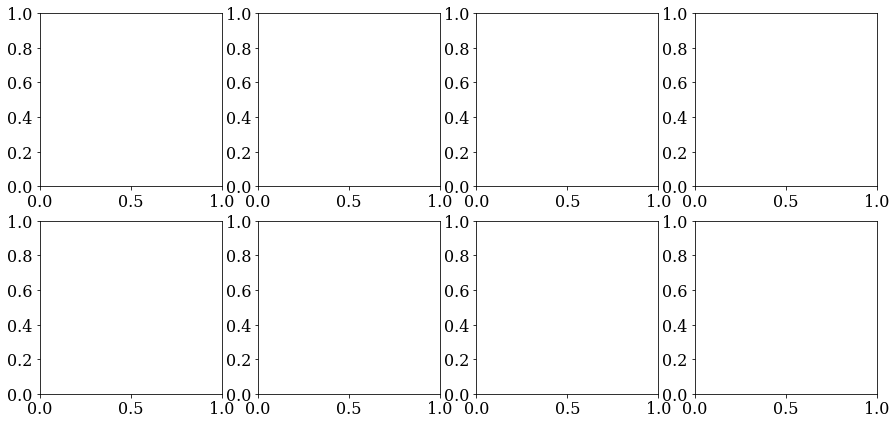

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 7))
lams_range = lams[:8]

for i, lam in enumerate(lams_range):
    ax = axes.flat[i]
    x= df["Mc"]
    y= df["eta"]
    c = df[f"bias_{i}"]/df["Mc_stat_err"]
    colormap="viridis"
    sc = ax.scatter(x,y, c=c, cmap=colormap, norm=matplotlib.colors.LogNorm(vmin=0.01, vmax=100))
    ax.set_ylabel("$\eta$")
    ax.set_xlabel("$M_c$")
    ax.set_title(f"$\lambda$={lams_range[i]:.2f}")

plt.tight_layout()

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.15, 0.025, 0.7])
fig.colorbar(sc, cax=cbar_ax, label="Mc Bias/$\sigma_{Mc}$")

plt.savefig(plotdir+'mc_bias_sig_vs_lambda_grid.pdf')
plt.show()
    

## Avg Bias vs Lambda

NameError: name 'sig_bias_lams' is not defined

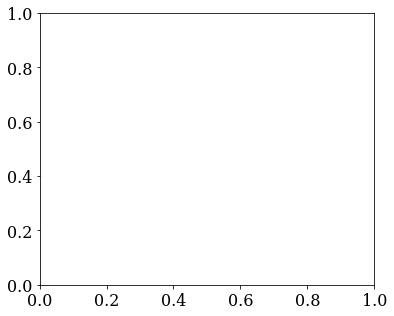

In [17]:
fig, ax = plt.subplots(figsize=(6, 5))

avg_bias_sig = np.sum(sig_bias_lams, axis=0)
plt.plot(lams, avg_bias_sig)

plt.xlim(0, 0.3)
plt.ylim(0, 1000)
plt.xlabel("$\lambda$")
plt.ylabel("Average Mc Bias/ $\sigma_{Mc}$")
plt.grid()
plt.tight_layout()
plt.savefig(plotdir+"avg_mc_bias_vs_lambda.pdf")
plt.show()

fig, ax = plt.subplots(figsize=(6, 5))

average_inner_prods =np.average(inner_prod_lams, axis=0)
plt.plot(lams, average_inner_prods)

plt.xlabel("Lambda")
plt.ylabel("Average Faithfulness")
plt.show()

## fraction of unbiased events vs lambda

In [9]:
unbiased_frac = np.zeros(n_lams)
for i in range(n_lams):
    bias = bias_lams.iloc[:,i].values
    stat_err = df["Mc_stat_err"].values
    unbiased_mask = (bias < stat_err)
    unbiased_frac[i] = np.sum(unbiased_mask)/len(df["Mc"])


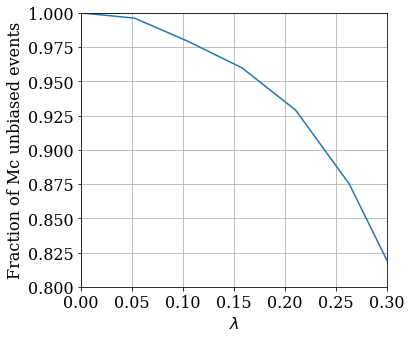

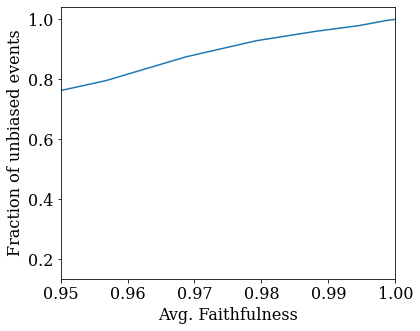

In [10]:
fig, ax = plt.subplots(figsize=(6, 5))
plt.plot(lams, unbiased_frac)
plt.xlabel("$\lambda$")
plt.ylabel("Fraction of Mc unbiased events")
plt.xlim(0, 0.3)
plt.ylim(0.8, 1.0)
plt.grid()
plt.tight_layout()
plt.savefig(plotdir+"mc_frac_unbiased_vs_lambda.pdf")
plt.show()

fig, ax = plt.subplots(figsize=(6, 5))
plt.plot(average_inner_prods, unbiased_frac)
plt.xlabel("Avg. Faithfulness")
plt.ylabel("Fraction of unbiased events")
plt.xlim(0.95, 1)
plt.show()